# Exercise 1 - Community Mobility Open Data

In [19]:
library('lubridate')
library('reshape2')
library('tidyverse')
library(dplyr)
library('ggplot2')
library('latex2exp')
library("gridExtra")
library(purrr)

Im going to compare data from Italy and Great Britain during 2021, since the latter started to lift restriction a few months before Italy. It could be intresting to have a look on how this decision reflects on our data.

In [20]:
mobility <- read_csv('Global_Mobility_Report.csv')
italy <- read_csv('Region_Mobility_Report_CSVs/2021_IT_Region_Mobility_Report.csv')
britain <- read_csv('Region_Mobility_Report_CSVs/2021_GB_Region_Mobility_Report.csv')

Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  place_id = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)
Warning message:
“10491070 parsing failures.
 row        col           expected                  actual                         file
7374 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
7375 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 

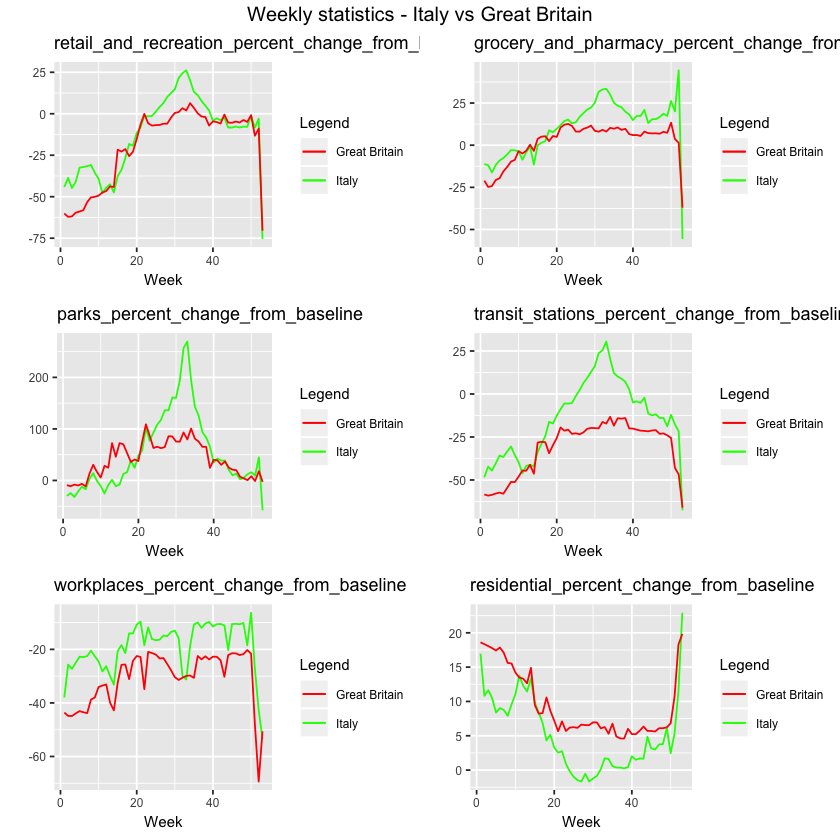

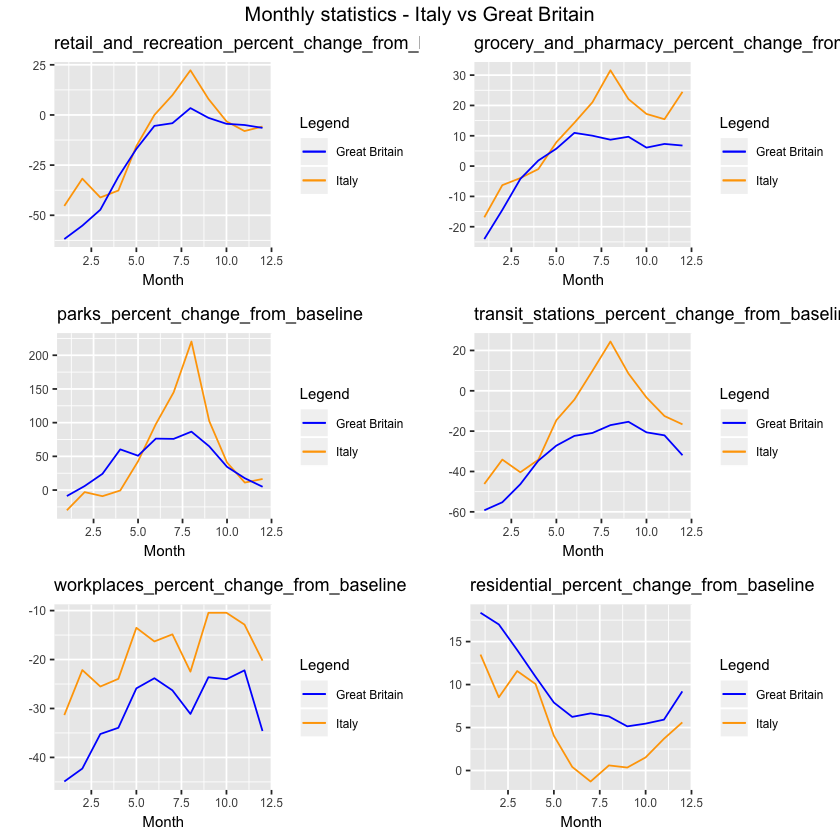

In [21]:
week_italy = aggregate(italy[, 10:15], list(isoweek(italy$date)), mean, na.rm=TRUE)
month_italy = aggregate(italy[, 10:15], list(month(italy$date)), mean, na.rm=TRUE)
week_britain = aggregate(britain[, 10:15], list(isoweek(britain$date)), mean, na.rm=TRUE)
month_britain = aggregate(britain[, 10:15], list(month(britain$date)), mean, na.rm=TRUE)
week <- week_italy[, 1]
month <- month_italy[, 1]

#Plots

plots = lapply(2:7, function(i) ggplot() + geom_line(aes(x = week, y = week_italy[,i], 
       , color='Italy')) +  geom_line(aes(x = week, y = week_britain[,i], color='Great Britain'
       )) +
    labs(colour="Legend", title=(colnames(week_italy)[i]),  x='Week', y='') + 
    theme(text = element_text(size=9)) +
   scale_colour_manual(values=c("red", "green")) 
   )


args <- c(plots, list(top = "Weekly statistics - Italy vs Great Britain")) 
require(gridExtra)
do.call(grid.arrange,  args)


plots = lapply(2:7, function(i) ggplot() + geom_line(aes(x = month, y = month_italy[,i], 
       , color='Italy')) +  geom_line(aes(x = month, y = month_britain[,i], color='Great Britain'
       )) +
    labs(colour="Legend", title=(colnames(month_italy)[i]),  x='Month', y='') + 
    theme(text = element_text(size=9)) +
   scale_colour_manual(values=c("blue", "orange")) 
   )

args <- c(plots, list(top = "Monthly statistics - Italy vs Great Britain")) 
require(gridExtra)
do.call(grid.arrange,  args)

# Exercise 2 - Random number generators

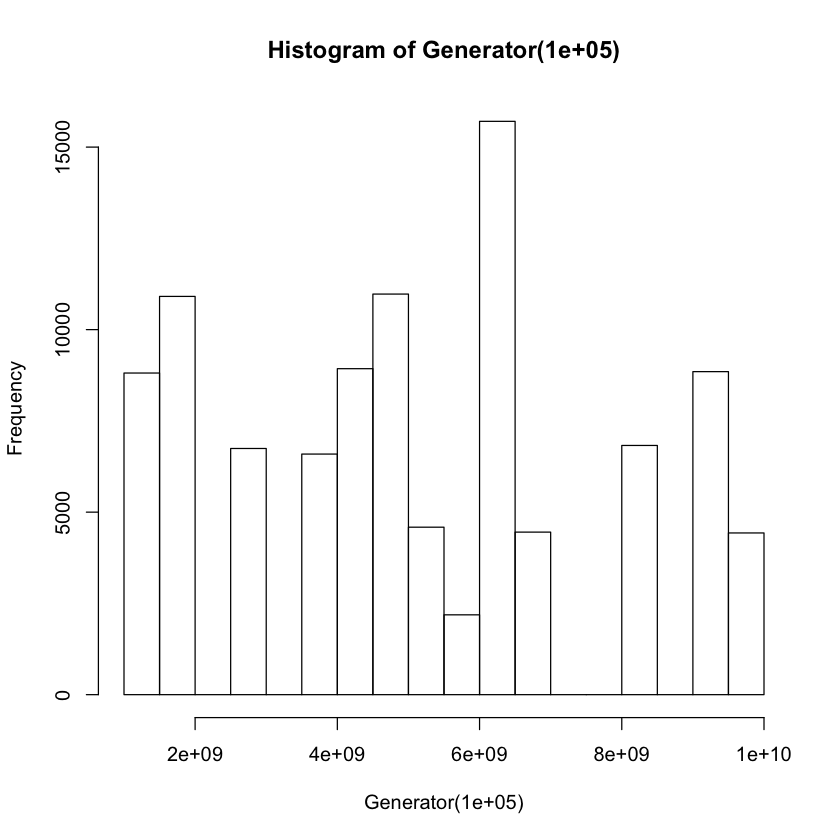

In [22]:
#Execution needs around 30 secs to be completed

Generator <- function(N) {
    
 n <- c()
    
 for (i in 1:N) {
     
      x <- sample(1:9, 10, replace=T)
      x.squared = x^2
      num <- unlist(strsplit(as.character(x.squared),""))
      len = length(num)
      slice = ceiling(len/2)
      vn = num[(slice-5):(slice+4)]
      random<-(as.numeric(paste(vn, collapse="")))
      n <- append(n, random)
     
  }  
  return(n)
    
}

hist(Generator(100000))

# Exercise 3 - Bayesian Inference

a) Given $p=\frac{29}{150}$ we have that the Likelihood of the process is
$f(y|p,n,M)={n\choose y}p^(1-p)^{n-y}$, with $y\leq n$, so a Binomial distribution

b) Considering a prior $P(p|M)=U(0,1)=B(1,1)$ the Posterior $P(p|y,M)$ will have the same shape of the Likelihood. We get:

$P(p|r,n,M)=\frac{1}{Z}p^{r+\alpha-1}(1-p)^{n-r+\beta-1}$=
$\frac{1}{B(r+1, n-r+1)}p^{r}(1-p)^{n-r}$ with $p \in [0, 1]$

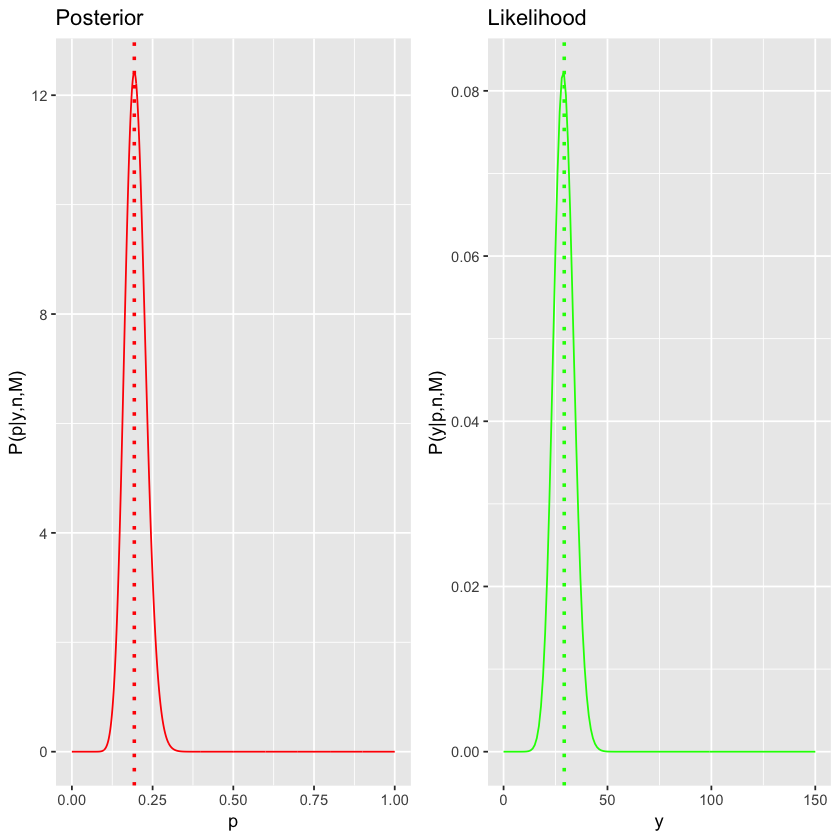

In [23]:
prob <- 29/150
t = 150 
r <- 29
x <- seq(0, t, len=t+1)
p <- seq(0, 1, len=1000)

likelihood <- dbinom(x, p=prob, size=t)
Factor = integrate(dbinom, lower=0, upper=1, x=r, size=t)$value
posterior <- dbinom(r, p=p, size=t)/Factor

m1 = r/t
m2 = (t+1)*prob


p1 <- ggplot()+geom_line(aes(x = p, y = posterior), col='red')+labs(title='Posterior', y='P(p|y,n,M)', x='p') +
geom_vline(xintercept = m1, linetype="dotted", 
                color = "red", size=1)

p2 <-ggplot()+geom_line(aes(x = x, y = likelihood), col='green')+labs(title='Likelihood', y='P(y|p,n,M)', x='y') +
geom_vline(xintercept = m2, linetype="dotted", 
                color = "green", size=1)


plots <- list(p1, p2)
args <- c(plots, ncol=2 ) 

do.call(grid.arrange, args)

# Exercise 4 - Bayesian Inference

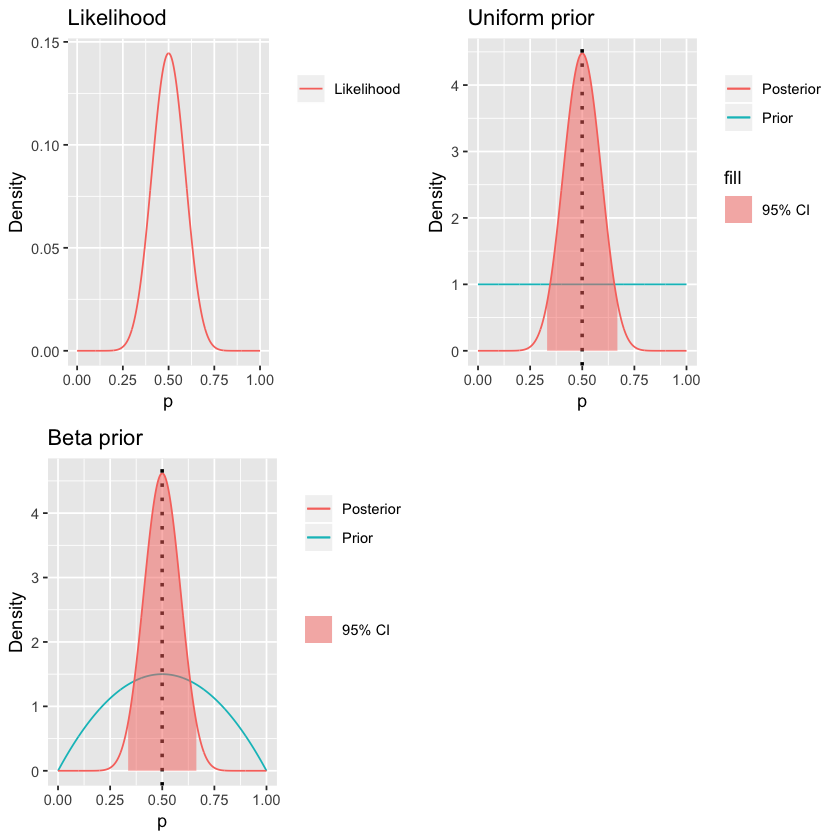

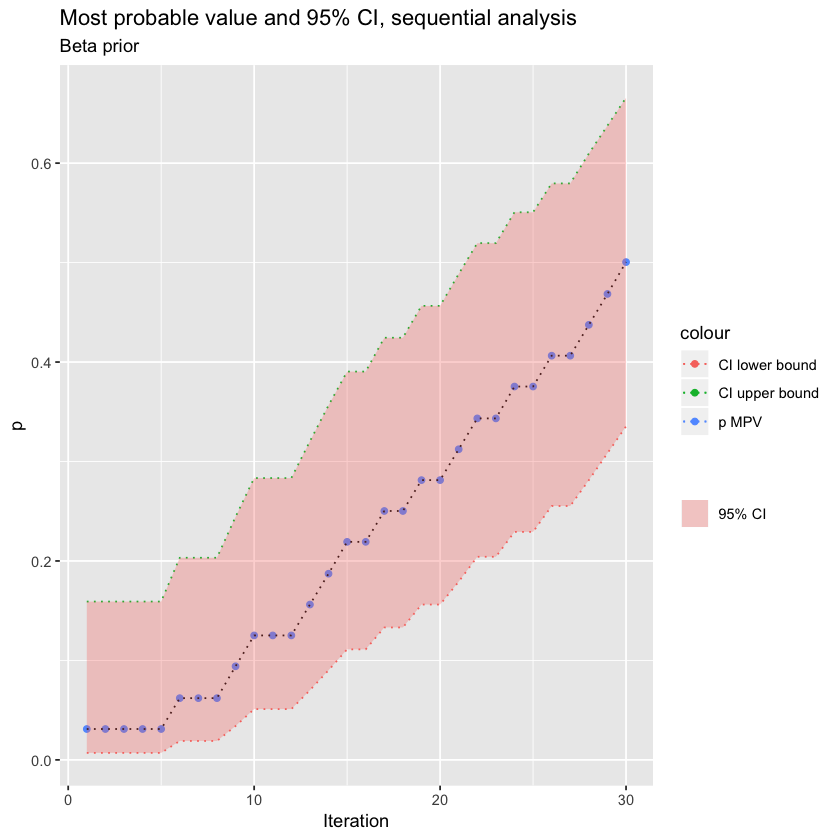

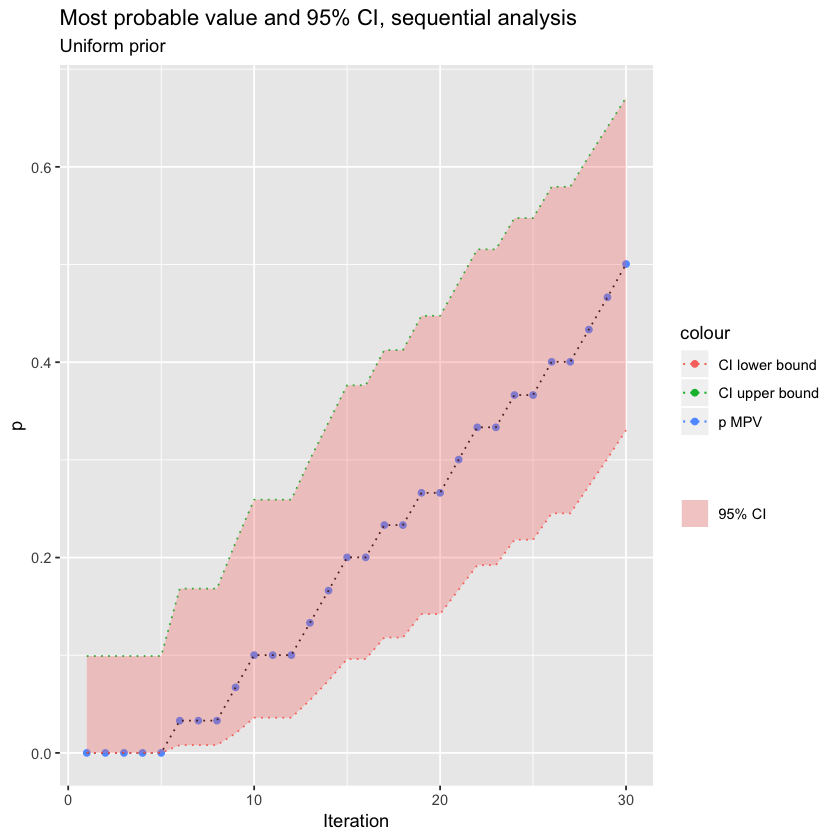

In [24]:
res <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H',
'H', 'H')

r <- nHeads <- sum(res=='H')
Tails <- sum(res=='T')
Trials <- length(res)

pHeads <- nHeads / Trials

#Upper limit
limit <- function(f, q, lower=0, upper=1, ...) {
    
        integral <- function(x){
                                         return(integrate(f=f, 
                                         lower, 
                                         upper=x, ...
                                        )$value)
                              
                    }
    
        F.inv <- function(y){
                                     uniroot(function(x){integral(x)-y}, 
                                     interval=c(lower, upper), 
                                     extendInt='yes', 
                                     tol=0.0001)$root
                        }
    return (F.inv(q))


} 

numLimit <- function(c, p, q) {
    x <- cumsum(c)/1000
    r <- 0
    for (i in 1:(length(x)-1)) {
        if (x[i]<q & x[i+1]>q) {
            r <- p[i+1]
        }
    }
    return(r)
    
    
} 

#Uniform
p <- seq(0,1,len=1000)
likelihood <- dbinom(x=r, p=p, size=Trials)

prior_u <- dunif(p)
norm_u <- integrate(dbinom, lower=0, upper=1, x=r, size=Trials)$value
posteriorF_u <- function(p){return(dbinom(r, Trials, p)/norm_u)}
posterior_u <- posteriorF_u(p)
p_unif = p[which.max(unlist(posterior_u))]
upperu = limit(f=posteriorF_u, q=0.975)
loweru= limit(f=posteriorF_u, q=0.025)

plot1<-ggplot()+geom_line(aes(x=p, y=likelihood, color='Likelihood'))+
labs(color='', y='Density', title='Likelihood')+
    theme(
    legend.position="right",
    legend.justification = c("right", "top"))


plot2<-ggplot()+geom_line(aes(x=p, y=prior_u, color='Prior'))+
geom_line(aes(x=p, y=posterior_u, color='Posterior'))+
geom_vline(xintercept = p_unif, linetype="dotted", size=1)+
geom_area(aes(y=posterior_u, x = ifelse(p>loweru & p< upperu , p, 0), fill='95% CI'), alpha=0.5)+
ylim(0, max(unlist(posterior_u)))+
    theme(
    legend.position="right",
    legend.justification = c("right", "top"))+
labs(colour='', y='Density', title='Uniform prior')


#Beta
a=2
b=2
prior_b <-dbeta(x=p, shape1=a, shape2=b)
norm_b<-integrate(dbeta, lower=0, upper=1, shape1=r+a, shape2=Trials-r+b)$value
posteriorF_b<-function(p){return(dbeta(x=p, shape1=r+a, shape2=Trials-r+b)/norm_b)}
posterior_b <- posteriorF_b(p)
upperb = limit(f=posteriorF_b, q=0.975)
lowerb= limit(f=posteriorF_b, q=0.025)


p_binom = p[which.max(unlist(posterior_b))]
plot3<-ggplot()+geom_line(aes(x=p, y=prior_b, color='Prior'))+
geom_line(aes(x=p, y=posterior_b, color='Posterior'))+
geom_vline(xintercept = p_binom, linetype="dotted", size=1)+
geom_area(aes(y=posterior_b, x = ifelse(p>lowerb & p< upperb , p, 0), fill='95% CI'), alpha=0.5)+
ylim(0, max(unlist(posterior_b)))+
    theme(
    legend.position="right",
    legend.justification = c("right", "top"))+
labs(colour='', y='Density', title='Beta prior', fill='')

grid.arrange(plot1, plot2, plot3, ncol=2)

#Credibility interval

posteriorF_u <- function(r, p){return(dbinom(r, Trials, p)/
                                   integrate(dbinom, lower=0, upper=1, x=r, size=Trials)$value)}

posteriorF_b<-function(r,p){return(dbeta(x=p, shape1=r+a, shape2=Trials-r+b )/
                                   integrate(dbeta, lower=0, upper=1, shape1=r+a, shape2=Trials-r+b)$value

)}

heads <- rep(0, Trials)
heads[res=='H']=1
cumHeads <-cumsum(heads)

title<- list('Beta prior', 'Uniform prior')
posteriorVec <- list(posteriorF_b, posteriorF_u)

for (i in 1:2) {
    posterior<-lapply(cumHeads, posteriorVec[[i]], p)
    post_mat <- matrix(unlist(posterior), nrow = length(posterior), byrow = TRUE)
    theta <- p[max.col(post_mat)]
    lower=apply(post_mat,1, numLimit, p=p,  q=0.025)
    upper=apply(post_mat,1, numLimit, p=p,  q=0.975)
    time <- c(1:30)
    plot1<- ggplot() + 
    geom_point(aes(x=time, y=theta, colour='p MPV'))+
    geom_line(aes(x=time, y=theta), linetype='dotted')+
    geom_line(aes(x=time, y=upper, color='CI upper bound'), linetype='dotted')+
    geom_line(aes(x=time, y=lower, color='CI lower bound'), linetype='dotted')+
    geom_ribbon(aes(x=time,ymin = lower, ymax = upper, fill = "95% CI"), alpha=0.3)+
    labs(x='Iteration', y='p', title='Most probable value and 95% CI, sequential analysis', subtitle=title[i], fill='')
    print(plot1)


    
}